In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pylab
import experiment_helpers
#Need to install umap_learn, pyDiffMap
import umap
from contrastive_loss import ContrastiveLoss
from my_umap import UMAP
from tsne1 import TSNE
from pydiffmap import diffusion_map as dm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time

Notebook containing final experiments:
1. UMAP Experiments
2. tSNE Experiments
3. Diffusion Mapping Experiments
4. Comparative Experiments

1. UMAP experiments

Epochs vs. Quality

In [2]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins = penguins.dropna()
penguin_data = penguins[
[
    "culmen_length_mm",
    "culmen_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
labels = [x for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]

Official Implementation:

In [3]:
x_vals = []
losses = []
myLoss = ContrastiveLoss(margin=5)
for i in range(0,100,5):
    x_vals.append(i)
    reducer = umap.UMAP(n_neighbors=15, n_epochs=i, verbose=False)
    embedding = reducer.fit_transform(scaled_penguin_data)
    losses.append(myLoss.get_loss(embedding, labels))

/Users/rakeshdasilva/.local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11008. The TBB threading layer is disabled.
  warnings.warn(problem)


Text(0.5, 1.0, 'Epochs vs Contrastive Loss for UMAP')

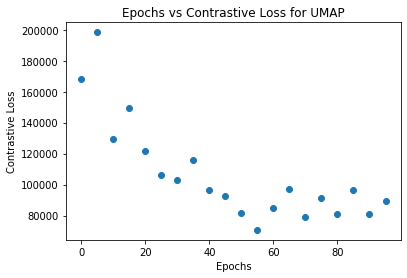

In [4]:
plot, axes = plt.subplots()
axes.scatter(x_vals, losses)

axes.set_xlabel('Epochs')
axes.set_ylabel('Contrastive Loss')  
axes.set_title("Epochs vs Contrastive Loss for UMAP")

This graph shows that as the epochs for optimization increase, the contrastive loss decreases. This is reasonable given the embedding should get better as it is optimized more.

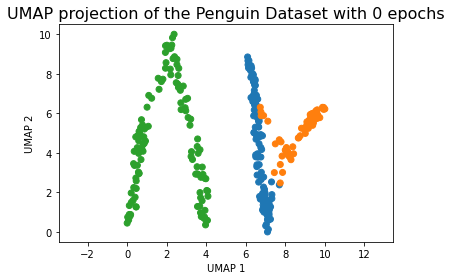

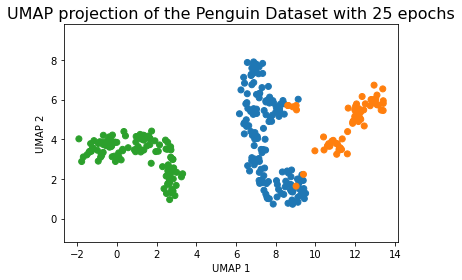

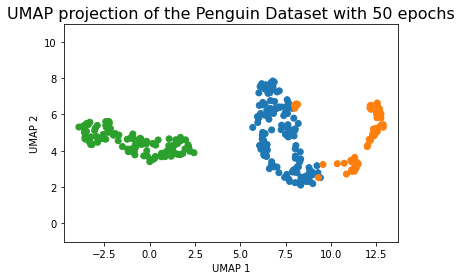

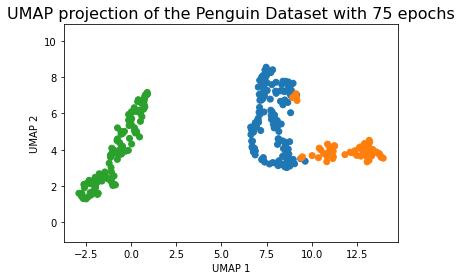

In [24]:
for i in range(0,100,25):
    reducer = umap.UMAP(n_neighbors=15, n_epochs=i, verbose=False, min_dist=.1)
    embedding = reducer.fit_transform(scaled_penguin_data)
    plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the Penguin Dataset with ' + str(i) + ' epochs', fontsize=16)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.show()

A few of the UMAP embeddings used to calculate contrastive loss above.

Our Implementation:

In [25]:
x_vals = []
losses = []
myLoss = ContrastiveLoss(margin=5)
for i in range(0,100,5):
    x_vals.append(i)
    myUmap = UMAP(n_neighbors = 15, dims=2, min_dist=.1, epochs=i)
    myUmap.fit(scaled_penguin_data)
    embedding = myUmap.Y
    losses.append(myLoss.get_loss(embedding, labels))

/Users/daniel/Desktop/CP307/dimensional-reduction/my_umap.py:62: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


Text(0.5, 1.0, 'Epochs vs Contrastive Loss for UMAP')

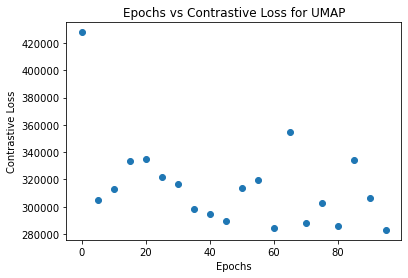

In [26]:
plot, axes = plt.subplots()
axes.scatter(x_vals, losses)

axes.set_xlabel('Epochs')
axes.set_ylabel('Contrastive Loss')  
axes.set_title("Epochs vs Contrastive Loss for UMAP")

This graph shows contrastive loss generally decreasing as epochs increase. This still makes sense. The trend is not as clear in the official implementation. This could be a product of some errors in our UMAP implementation.

/Users/daniel/Desktop/CP307/dimensional-reduction/my_umap.py:62: RuntimeWarning: divide by zero encountered in true_divide
  1.0 / np.sqrt(diag_data), 0, graph.shape[0], graph.shape[0]


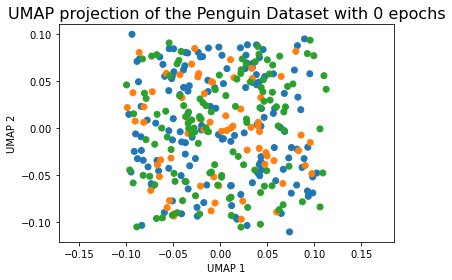

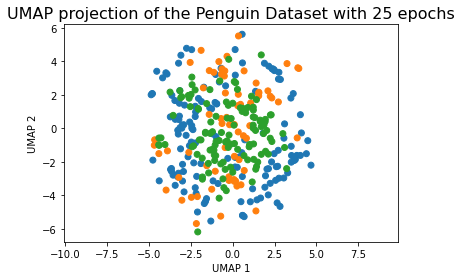

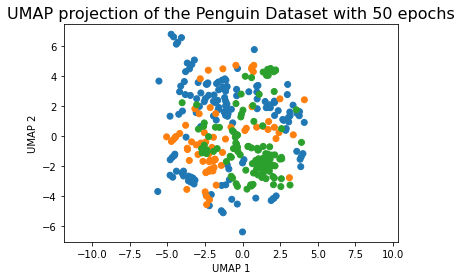

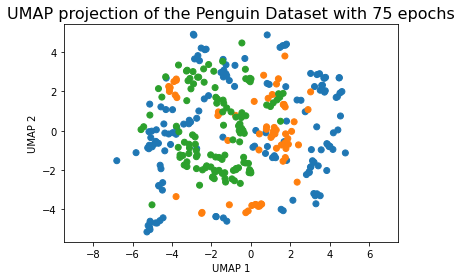

In [4]:

for i in range(0,100,25):
    myUmap = UMAP(n_neighbors = 15, dims=2, min_dist=.1, epochs=i)
    myUmap.fit(scaled_penguin_data)
    embedding = myUmap.Y
    plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the Penguin Dataset with ' + str(i) + ' epochs', fontsize=16)
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.show()

A few of the UMAP plots used to calculate contrastive loss from above.

2. tSNE Experiments <br>
Our implementation

In [3]:
tsne = TSNE()

In [4]:
def test_iterations(start, end, increment, map_iteration):
    p, e, m = 20, 4, 0.5
    loss = ContrastiveLoss(5)
    all_quality = []
    all_i = []
    all_time = []
    for i in range(start, end, increment):
        start = time.time()
        Y = tsne.tsne(scaled_penguin_data, dims = 2, perplexity = p, exageration = e, momentum = m, iterations = i)
        end = time.time()
        losses = loss.get_loss(Y, labels)
        all_quality.append(losses)
        all_i.append(i)
        all_time.append(end-start)
        if i % map_iteration == 0:
            pylab.title(f"t-SNE projection with {i} iterations")
            pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=labels)
            pylab.show()
    pylab.title("Iterations vs Quality for t-SNE") 
    pylab.xlabel("Iterations")
    pylab.ylabel("Loss")
    pylab.scatter(all_i, all_quality)
    pylab.show()
    pylab.scatter(all_i, all_time)
    pylab.show()
    pylab.scatter(all_quality, all_time)
    pylab.show()

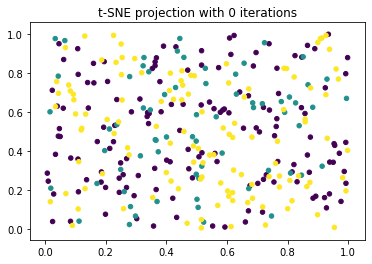

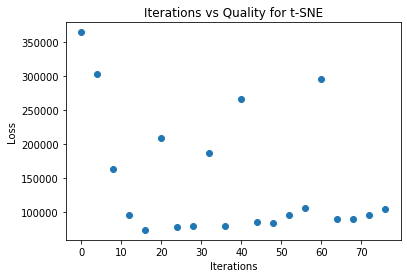

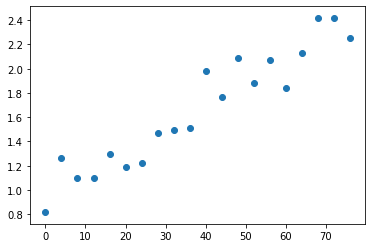

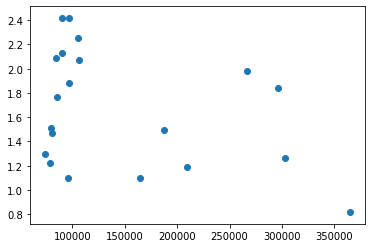

In [23]:
test_iterations(0, 80, 4, 50)

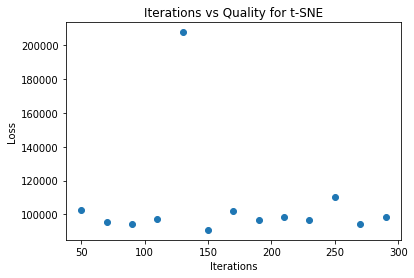

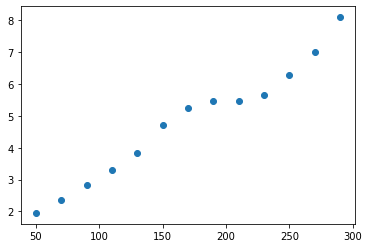

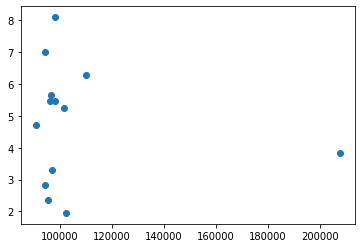

In [24]:
test_iterations(50,300,20, 500)

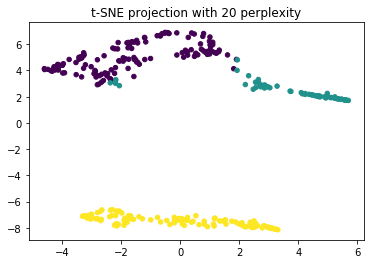

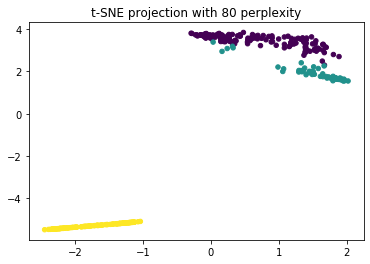

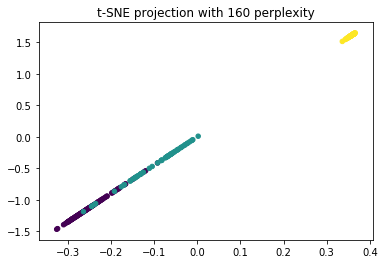

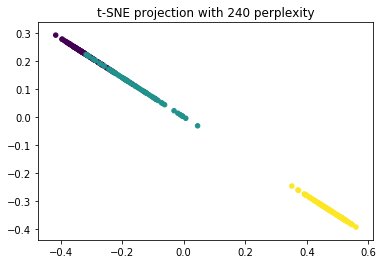

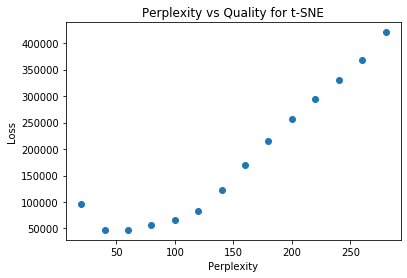

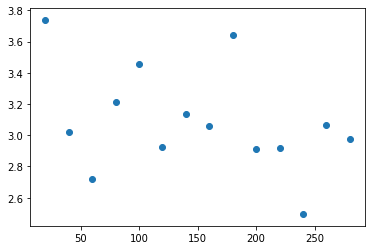

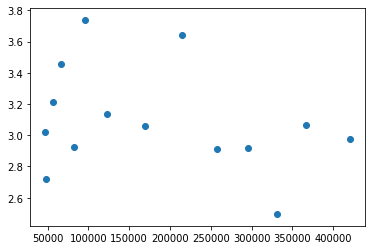

In [30]:

all_quality = []
all_perp = []
all_time = []
for i in range(20, 300, 20):
    start = time.time()
    Y = tsne.tsne(scaled_penguin_data, dims = 2, perplexity = i, exageration = 4, momentum = 0.65, iterations = 100)
    end = time.time()
    losses = loss.get_loss(Y, labels)
    all_quality.append(losses)
    all_perp.append(i)
    all_time.append(end-start)
    if i % 80 == 0 or i == 20:
        pylab.title(f"t-SNE projection with {i} perplexity")
        pylab.scatter(Y[:, 0], Y[:, 1], s=20, c=labels)
        pylab.show()
pylab.title("Perplexity vs Quality for t-SNE") 
pylab.xlabel("Perplexity")
pylab.ylabel("Loss")
pylab.scatter(all_perp, all_quality)
pylab.show()
pylab.scatter(all_perp, all_time)
pylab.show()
pylab.scatter(all_quality, all_time)
pylab.show()

3. Diffusion Mapping Experiments

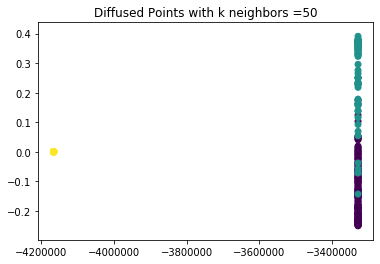

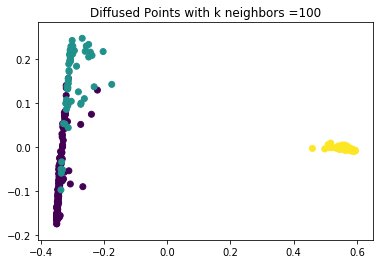

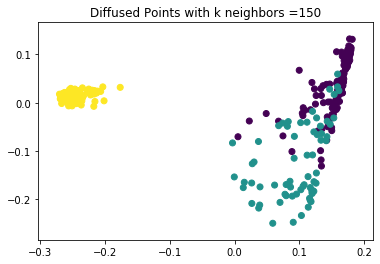

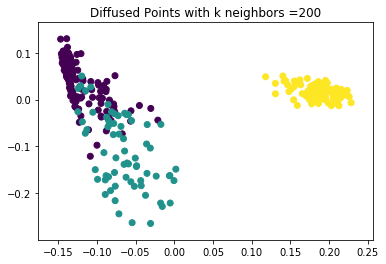

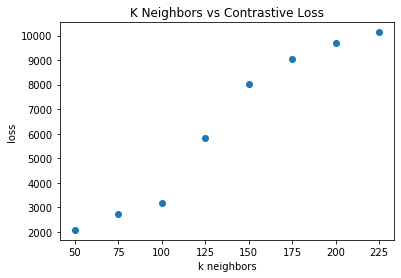

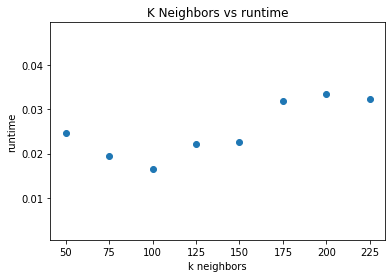

In [18]:
loss = ContrastiveLoss()
kvals = []
qualities = []
times = []
for i in range(50,250, 25):
    start = time.time()
    dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = 0.5, k=i)
    diffused_points = dmap.fit_transform(scaled_penguin_data)
    end = time.time()
    
    runtime = end - start
    times.append(runtime)
    kvals.append(i)
    losses = loss.get_loss(diffused_points, labels)
    qualities.append(losses)
    
    if i % 50 == 0:
        pylab.scatter(diffused_points[:,0], diffused_points[:,1], c=labels)        
        pylab.title('Diffused Points with k neighbors =' + str(i))
        pylab.show()
    
pylab.scatter(kvals, qualities)
pylab.title('K Neighbors vs Contrastive Loss')
pylab.xlabel('k neighbors')
pylab.ylabel('loss')
pylab.show()


pylab.scatter(kvals, times)
pylab.title('K Neighbors vs runtime')
pylab.xlabel('k neighbors')
pylab.ylabel('runtime')
pylab.show()

In [26]:
def test_alpha():
    alpha_values = [0.01, 0.5, 1, 3, 5, 7, 10]
    loss = ContrastiveLoss()
    avals = []
    qualities = []
    times = []
    
    for a in alpha_values:
        start = time.time()
        dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = a, k=150)
        diffused_points = dmap.fit_transform(scaled_penguin_data)
        end = time.time()

        runtime = end - start
        times.append(runtime)
        avals.append(a)
        losses = loss.get_loss(diffused_points, labels)
        qualities.append(losses)

        pylab.scatter(diffused_points[:,0], diffused_points[:,1], c=labels)        
        pylab.title('Diffused Points with alpha =' + str(a))
        pylab.show()

    pylab.scatter(avals, qualities)
    pylab.title('Alpha Values vs Contrastive Loss')
    pylab.xlabel('alpha')
    pylab.ylabel('loss')
    pylab.show()

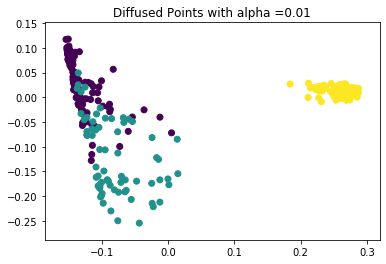

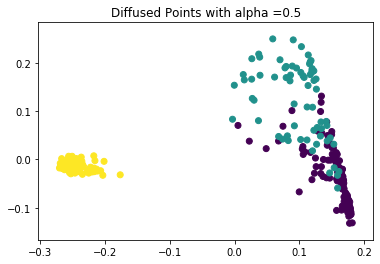

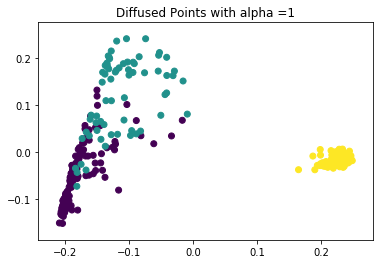

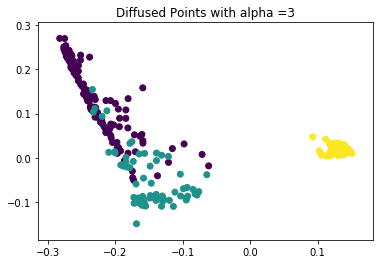

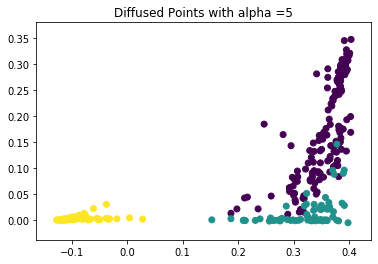

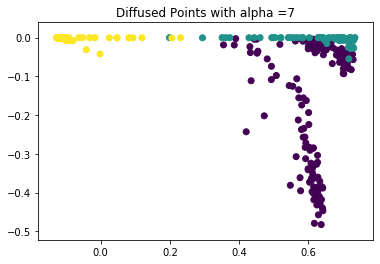

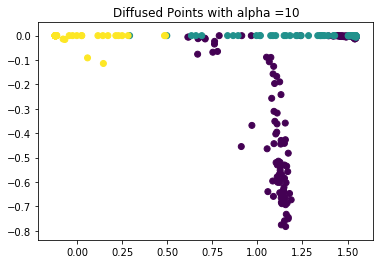

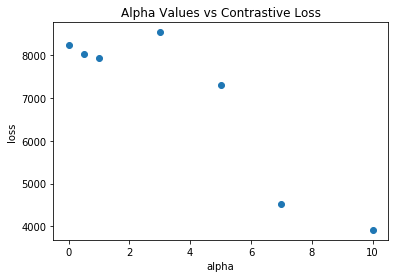

In [27]:
test_alpha()

4. Comparative Experiments

In [2]:
#training, test split
train_data, train_label, test_data, test_label = experiment_helpers.get_Data()

In [3]:
#constrastive loss instance
myLoss = ContrastiveLoss(margin=5)

Get Optimum parameters for UMAP on training data.

In [4]:
epochs, neighbors, min_dist, loss = experiment_helpers.umap_coordinate_descent(train_data,train_label)

Get Loss on test dataset with optimized values

In [5]:
reducer = umap.UMAP(n_neighbors=neighbors, n_epochs=epochs, verbose=False, min_dist=min_dist)
start = time.time()
embedding = reducer.fit_transform(test_data)
end = time.time()
umap_loss = myLoss.get_loss(embedding, test_label)
umap_time = end - start

Get Optimum parameters for t-SNE on training data.

In [6]:
tsne = TSNE()
p, e, m, i, s = experiment_helpers.tsne_coordinate_descent(train_data, train_label, tsne)

30 29898.367047544358
4 29824.86009424194
0.65 29060.25559038614
38.065044950046264 29041.510130342343
3.9893568818738956 30182.860439336764
0.8780193260011777 30162.125848172705

29041.510130342343
39.44271909999159 3.9893568818738956 0.8780193260011777 100


Get Loss and Time on test dataset with optimized values for t-SNE

In [7]:
tsne_score, tsne_time = experiment_helpers.tsne_score_test(test_data, test_label, p, e,  m, i, tsne)
print(tsne_score, tsne_time)

4501.00865165409 0.20273995399475098


Get Optimum parameters for Diffusion Map on training data.

In [8]:
a, k_neighbors = experiment_helpers.diffmap_coordinate_descent(test_data, test_label)

Get Loss and Time on test dataset with optimized values for t-SNE

In [10]:
start = time.time()
dmap=dm.DiffusionMap.from_sklearn(n_evecs = 2,epsilon = 1.0, alpha = a, k= k_neighbors)
diffused_points = dmap.fit_transform(test_data)
end = time.time()

diffusion_runtime = end-start

diffusion_closs = myLoss.get_loss(diffused_points, test_label)

print('time ' + str(diffusion_runtime))
print('loss '+ str(diffusion_closs))

time 0.02045607566833496
loss 13710.012721277475


Algorithm vs Loss Graph

Text(0, 0.5, 'Contrastive Loss')

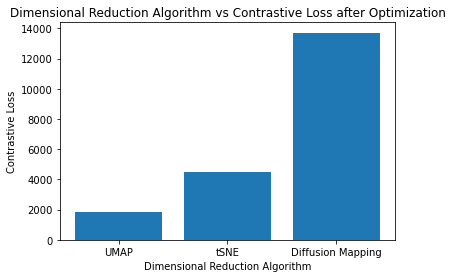

In [11]:
plt.bar(["UMAP", "tSNE", "Diffusion Mapping"], [umap_loss, tsne_score, diffusion_closs])
plt.title("Dimensional Reduction Algorithm vs Contrastive Loss after Optimization")
plt.xlabel("Dimensional Reduction Algorithm")
plt.ylabel("Contrastive Loss")

This plot shows that UMAP has the best embedding, followed by tSNE, finally followed by Diffusion Mapping. It is important to note this is specific to the data and is hard to extend these results generally. Additionally, all of the the algorithms were optimized first with coordinate descent.

Algorithm vs time graph

Text(0, 0.5, 'Time to Generate Embedding (s)')

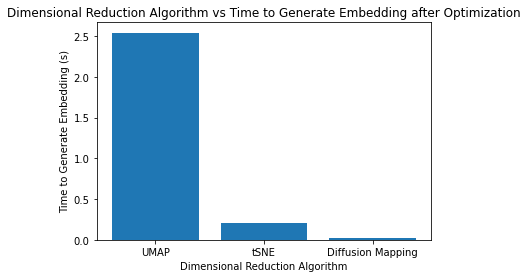

In [13]:
plt.bar(["UMAP", "tSNE", "Diffusion Mapping"], [umap_time, tsne_time, diffusion_runtime])
plt.title("Dimensional Reduction Algorithm vs Time to Generate Embedding after Optimization")
plt.xlabel("Dimensional Reduction Algorithm")
plt.ylabel("Time to Generate Embedding (s)")

This plot shows Algorithm vs time to generate embedding for the test data. It is weird how much longer UMAP is taking given UMAP is supposed to be faster. However, it is possible since our test dataset is so small that these run times are not representative of how the algorithms perform with larger data sets. From this data, diffusion mapping is the fastest, followed by tSNE, with UMAP a long ways back.